# Finding the Optimal Pre-set Boundaries for Pairs Trading Strategy Based on Cointegration Technique

## Heni Puspaningrum $^{1}$, Yan-Xia $\operatorname{Lin}^{2}$, Chandra Gulati $^{3}$
## School of Mathematics and Applied Statistics 
## University of Wollongong, Australia

### Summary by *Daniel Norouzi Mobarekeh*
### Sharif University Of Technology

# Part I

## Abstract

Pairs trading incorporates the use of a standard statistical model to exploit the stocks that are out of equilibrium for short-term time. In determining which two stocks can be a pair, Banerjee et al. (1993) shows that the cointegration technique is more effective than correlation criterion for extracting profit potential in temporary pricing anomalies. This paper explores the ways in which the pre-set boundaries chosen to open a trade can influence the minimum total profit over a specified trading horizon. The higher the pre-set boundaries for opening trades, the higher the profit per trade but the lower the trade numbers. The opposite applies for lowering the boundary values. The aims of this paper are to develop numerical algorithm to estimate the average trade duration, the average inter-trade interval, and the average number of trades and then use them to find the optimal pre-set boundaries that would maximize the minimum total profit for cointegration error following an $\mathrm{AR}(1)$ process.

## 1. Introduction

Pairs trading idea is to take the arbitrage opportunity of temporary anomalies between related stocks which have long-run equilibrium. We can then invest in a two-stock portfolio (a pair) where the overvalued stock is sold (short position) and the undervalued stock is bought (long position). The trade is closed out by taking the opposite position of these stocks after the stocks have settled back into their long-run relationship. The profit is not dependent on the movement of the market.

According to (Gatev et al.,1999, 2006), it appears that the growing popularity of the pairs trading strategy lead to the opportunities to trade become much smaller. However, Gillespie and Ulph (2001), Habak (2002), and Hong and Susmel (2003) show that significant returns could still be made in more recent times with the strategy. Futrher discussions can be found in Gatev et al (1999, 2006), Vidyamurthy (2004), Whistler (2004)and Ehrman (2006).

In determining which two stocks can be a pair, people commonly choose two stocks that are highly correlated (see Stone (http://www.investopedia.com), AveryWright (http://compareshares.com.au), Goodboy (http://biz.yahoo.com) and Ehr man (2006)). However, Banerjee et al. (1993) shows that the cointegration technique is more effective than correlation as the cointegration relationship guarantees that the two stocks have a long-run stationary relationship. Gillespie and Ulph (2001), Hong and Susmel (2003), Vidyamurthy (2004) and Herlemont (www.yats.com) also suggest this technique.

Substantial literature (see, for example, Fama and French, 1988; Liu et al., 1997; Narayan, 2005; and references cited therein) confirm that stock prices are I(1) non-stationary time series. Sometimes an appropriate linear combination of two I(1) non-stationary time series could form a stationary time series where we say these two $\mathrm{I}(1)$ series are cointegrated.

In order to determine whether cointegration exists between two time series there are two techniques that are generally used. The Engle-Granger approach uses OLS (Ordinary Least Squares) to estimate the long-run steady-state relationship between the variables in the model, and then test whether the residual from the equation is stationary or not. There are some criticisms of this approach, e.g.: (1) this test for cointegration is likely to have lower power than the alternative tests; (2) its finite sample estimates of long-run relationships are potentially biased; and (3) inferences cannot be drawn using standard $t$-statistics about the significance of the parameters of the static long-run model (Harris, 1995). To overcome the problems found in the Engle-Granger approach, the Johansen's approach uses a vector error-correction model (VECM) so that all variables can be endogenous. More discussion about these two methods can be found in Harris (1995). 

The pairs trading strategy, using a cointegration technique, is briefly introduced below :

Consider two shares $S 1$ and $S 2$ whose prices are I(1). If the share prices $P_{S 1, t}$ and $P_{S 2, t}$ are cointegrated, there exist cointegration coefficients 1 and $\beta$ corresponding to $P_{S 1, t}$ and $P_{S 2, t}$ respectively, such that a cointegration relationship can be constructed as follows:

$$
P_{S 1, t}-\beta P_{S 2, t}=\epsilon_{t}^{*},
$$

where $\epsilon_{t}^{*}$ (the actual cointegration error) is a stationary time series.


In [130]:
import numpy as np
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as ts
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
import math
%matplotlib inline

In [131]:
# Download data from Yahoo Finance function
def fetch_data(stock, start, end):
    stock_data = {}
    ticker = yf.download(stock, start, end)
    stock_data['Price'] = ticker['Close']
    return pd.DataFrame(stock_data)

In [132]:
# Plot stock prices
def plot_stocks(data1, data2):
    sns.set()
    plt.rcParams['figure.figsize'] = [9, 6]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Pair Of Stocks')
    sns.set()
    ax1.plot(data1)
    ax2.plot(data2)
    plt.show()

In [133]:
# Plot pair plot
def plot_pairs(data1, data2, stock1, stock2):
    sns.set_theme(color_codes=True)
    data = pd.DataFrame({stock1 : data1.values[:,0], stock2 : data2.values[:,0]})
    sns.lmplot(x=stock1, y=stock2, data=data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


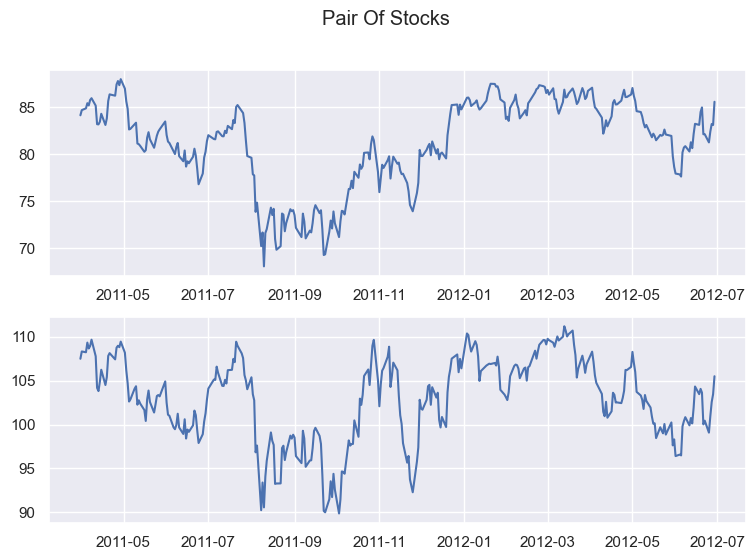

In [134]:
TRAIN_START_DATE = datetime.datetime(2011, 4, 1)
TRAIN_END_DATE = datetime.datetime(2012, 7, 1)
STOCK1 = 'XOM'
STOCK2 = 'CVX'

# Download data
stock1 = fetch_data(STOCK1, TRAIN_START_DATE, TRAIN_END_DATE)
stock2 = fetch_data(STOCK2, TRAIN_START_DATE, TRAIN_END_DATE)

# Plot stocks
plot_stocks(stock1, stock2)

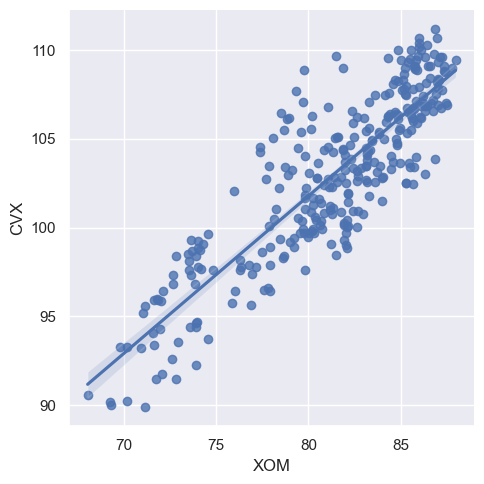

In [135]:
# Plot pairs
plot_pairs(stock1, stock2, STOCK1, STOCK2)

$$P_{S 1, t} = \beta P_{S 2, t} +\epsilon_{t}^{*}$$

In [136]:
# Using linear regression to find to find the cointegration between stock prices
reg = LinearRegression().fit(stock2.values[:,0].reshape(-1, 1), stock1.values[:,0])
beta = reg.coef_[0]
print('Beta = ' + str(beta)) 

Beta = 0.856435855256016


In [137]:
# Calculate cointegration error
coin_error = stock1.values[:,0] - beta * stock2.values[:,0]

# Execute Augmented Dickey Fuller Test to check if cointegration error is stationary
adf = ts.adfuller(coin_error)
print(adf)

(-2.6533517337015162, 0.08246409336824417, 0, 315, {'1%': -3.451281394993741, '5%': -2.8707595072926293, '10%': -2.571682118921643}, 634.3843493119089)



Define $\epsilon_{t}$ (the adjusted cointegration error) is as follows:

$$
\epsilon_{t}=\epsilon_{t}^{*}-E\left(\epsilon_{t}^{*}\right),
$$


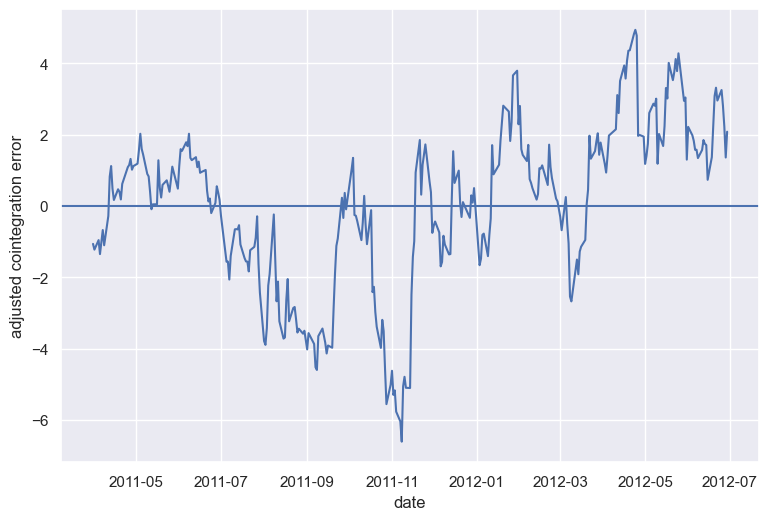

In [138]:
# Calculate adjusted cointegration error
adj_coin_error = coin_error - coin_error.mean()

df = pd.DataFrame({'date': stock1.index,
                   'adjusted cointegration error': adj_coin_error})
graph = sns.lineplot(x='date', y='adjusted cointegration error', data=df)
graph.axhline(0)


where $\epsilon_{t}$ is also a stationary time series and $E(.)$ means the expectation. The actual cointegration error $\epsilon_{t}^{*}$ is adjusted so that the mean of the adjusted cointegration error $E\left(\epsilon_{t}\right)$ is zero in order to simplify subsequent analysis.

We have to set an upper-bound $U(U>0)$ and a lower-bound $L(L<0)$ before we apply the pairs trading. The function of these boundaries act as a threshold to open a trade. Let $N_{S 1}$ and $N_{S 2}$ denote the number of shares $S 1$ and $S 2$ respectively. Two type of trades, U-trades and L-trades, are considered. For a U-trade, a trade is $\mathrm{I}(1)$ means the time series is non-stationary but the first difference is stationary. opened when the adjusted cointegration error is higher than or equal to the pre-set upper-bound $U$ by selling $N_{S 1}$ of $S 1$ shares and buying $N_{S 2}$ of $S 2$ shares and then closing the trade when the adjusted cointegration error is less than or equal to zero. The opposite happens for the L-trade. It is assumed that the actual cointegration error $\left(\epsilon_{t}^{*}\right)$ as well as the adjusted cointegration error $\left(\epsilon_{t}\right)$ are stationary processes and have symmetric distributions, so the lengths from the upper-bound $U$ to the mean and from the lower-bound $L$ to the mean are the same. As a result, the expected number of U-trades and L-trades are the same. For details, see Lin et al. $(2003,2006)$.

In our discussion, the following terms will be required.

- Trade duration is the time between opening and closing a U-trade (an L-trade).

- Inter-trade interval is the time between two consecutive U-trades (L-trades) or the time between closing a U-trade(an L-trade) and then opening the next U-trade(L-trade). We assume that there is no open trade (neither U-trade nor L-trade) if the previous trade has not been closed yet.

- Period is the sum of the trade duration and the inter-trade interval for U-trades (L-trades).

As the expected numbers of U-trades and L-trades are the same, the expected number of U-trades can be doubled to obtain the expected number of trades.

![](https://cdn.mathpix.com/cropped/2022_01_27_9c31843e02255df9a6c8g-05.jpg?height=425&width=727&top_left_y=144&top_left_x=281)

Lin et al. $(2003,2006)$ develop a pairs trading strategy based on a cointegration technique called the cointegration coefficients weighted (CCW) rule. The CCW rule works by trading the number of $S 1$ and $S 2$ shares as a proportion of cointegration coefficients to achieve a pre-set minimum profit per trade. The pre-set minimum profit per trade corresponds to the pre-set boundaries $U$ and $L$ chosen to open trades. 

The minimum total profit (MTP) corresponds to the pre-set minimum profit per trade and the number of trades during the trading horizon. The higher the preset boundaries for opening trades, the higher the minimum profit per trade but the lower the trade numbers. The opposite applies for lowering the boundary values.

The number of trades over a specified trading horizon is determined jointly by the average trade duration and the average inter-trade interval. For any pre-set boundaries, both of those values are estimated by making an analogy to the mean first-passage times for an $\operatorname{AR}(1)$ process. This paper applies an integral equation approach to evaluate the mean first-passage times from Basak and Ho (2004).

# Part II

## 2. Minimum Profit Per Trade

We are going to determine the number of shares of $S 1$ and $S 2$ required to find the pre-set minimum profit per trade. Contemplate the subsequent assumptions.

1. The 2 share price series are cointegrated over the relevant period of time.

2. Long (buy) and short (sell) positions continually apply to identical shares within the share-pair.

3. Short sales are permissible or attainable through a broker and there's no interest charged for the short sales and no charge for trading.

4. $\beta>0$

### 2.1. U-trades

For two cointegrated shares, $S 1$ and $S 2$, by Assumption 1 once $\epsilon_{t} \geq U$,  $S 1$ is overvalued whereas $S 2$ is undervalued, in respect to their equilibrium (If $\epsilon_{t} \leq 0$, the opposite is true). A position is opened at this time$t_{o}$ by selling $N_{S 1}$ of $S 1$ shares and buying $N_{S 2}$ of $S 2$.When $\epsilon_{t} \leq 0$ at time $t_{c}$, the positions are closed out.
Profit per trade would be

$$
P=N_{S 2}\left(P_{S 2, t_{c}}-P_{S 2, t_{o}}\right)+N_{S 1}\left(P_{S 1, t_{o}}-P_{S 1, t_{c}}\right) .
$$

By to the CCW rule as in Lin et al. (2003, 2006), if $N_{S 1}=1$ and $N_{S 2}=\beta$, the minimum profit per trade can be found by: 

$$
\begin{aligned}
P &=N_{S 2}\left(P_{S 2, t_{c}}-P_{S 2, t_{o}}\right)+N_{S 1}\left(P_{S 1, t_{o}}-P_{S 1, t_{c}}\right) \\
&=\beta\left[P_{S 2, t_{c}}-P_{S 2, t_{o}}\right]+\left[P_{S 1, t_{o}}-P_{S 1, t_{c}}\right] \\
&=\beta\left[P_{S 2, t_{c}}-P_{S 2, t_{o}}\right]+\left[\left(\epsilon_{t_{o}}+E\left(\epsilon_{t}^{*}\right)+\beta P_{S 2, t_{o}}\right)-\left(\epsilon_{t_{c}}+E\left(\epsilon_{t}^{*}\right)+\beta P_{S 2, t_{c}}\right)\right] \\
&=\left(\epsilon_{t_{o}}-\epsilon_{t_{c}}\right) \geq U .
\end{aligned}
$$

### 2.2. L-trades

For our L-trade, the pre-set lower-bound $L$ can be defined to be $-U$. Therefore, a position is opened when $\epsilon_{t} \leq-U$ by selling $S 2$ and buying $S 1$. Profit per trade would be:

$$
P=N_{S 2}\left(P_{S 2, t_{o}}-P_{S 2, t_{c}}\right)+N_{S 1}\left(P_{S 1, t_{c}}-P_{S 1, t_{o}}\right) .
$$

Same as the finding of minimum profit per trade for an U-trade, let $N_{S 2}=\beta$ and $N_{S 1}=1$. So,

$$
\begin{aligned}
P &=\beta\left[P_{S 2, t_{o}}-P_{S 2, t_{c}}\right]+\left[P_{S 1, t_{c}}-P_{S 1, t_{o}}\right] \\
&=\beta\left[P_{S 2, t_{o}}-P_{S 2, t_{c}}\right]+\left[\left(\epsilon_{t_{c}}+E\left(\epsilon_{t}^{*}\right)+\beta P_{S 2, t_{c}}\right)-\left(\epsilon_{t_{o}}+E\left(\epsilon_{t}^{*}\right)+\beta P_{S 2, t_{o}}\right)\right] \\
&=\left(\epsilon_{t_{c}}-\epsilon_{t_{o}}\right) \geq U .
\end{aligned}
$$

For L-trades we have to borrow cash since with $\epsilon_{t}<0$ at the opening, cocludes that the income from short saling $\beta$ unit shares $S 2$ is not enough to buy 1 unit share $S 1$.


## 3. Mean First-passage Time of an  Process and Pairs Trading

The actual cointegration error $\left(\epsilon_{t}^{*}\right)$ and the adjusted cointegration error $\left(\epsilon_{t}\right)$ might mimic linear stationary processes (like White noise, Autoregressive, Moving average, and Autoregressive-Moving Average processes), non-linear stationary processes etc. Elliott (2005) used the Ornstein-Uhlenbeck process to find the best boundaries. Resulting from the complexity of stochastic analysis in the Ornstein-Uhlenbeck process, their results are difficult to apply in practice. 

### 3.1. The mean first-passage time of an AR(1) process using an integral equation approach


We have an $\mathrm{AR}(1)$ process:

$$
Y_{t}=\phi Y_{t-1}+\xi_{t},
$$

where $-1<\phi<1$ and $\xi_{t} \sim$ i.i.d $N\left(0, \sigma_{\xi}^{2}\right)$.

The first-passage time $\mathcal{T}_{a, b}\left(y_{0}\right)$ :
$$
\mathcal{T}_{a, b}\left(y_{0}\right)=\inf \left\{t: Y_{t}>b \text { or } Y_{t}<a \mid a \leq Y_{0}=y_{0} \leq b\right\}
$$

We have:

$$
\mathcal{T}_{a}\left(y_{0}\right)=\mathcal{T}_{a, \infty}\left(y_{0}\right)=\inf \left\{t: Y_{t}<a \mid Y_{0}=y_{0} \geq a\right\}
$$


$$
\mathcal{T}_{b}\left(y_{0}\right)=\mathcal{T}_{-\infty, b}\left(y_{0}\right)=\inf \left\{t: Y_{t}>b \mid b \geq Y_{0}=y_{0}\right\}
$$

$E\left(\mathcal{T}_{a, b}\left(y_{0}\right)\right), E\left(\mathcal{T}_{a}\left(y_{0}\right)\right)$, and $E\left(\mathcal{T}_{b}\left(y_{0}\right)\right)$ denote the mean first-passage time of $\mathcal{T}_{a, b}\left(y_{0}\right), \mathcal{T}_{a}\left(y_{0}\right)$, and $\mathcal{T}_{b}\left(y_{0}\right)$. Basak and Ho (2004) found the mean first-passage time with an integral equation approach.

We specify a discrete-time real-valued Markov process $\left\{Y_{t}\right\}$ on the probability space $\{\Omega, \mathcal{F}, \mathcal{P}\}$ with stationary continuous transition density $f(y \mid x)$ which reflects the transition density of reaching $y$ at the next step given that the current state is $x$. We have $Y_{0}=y_{0} \in[a, b]$. The mean first-passage time over $[a, b]$ of an $\operatorname{AR}(1)$ process, with the initial state $y_{0} \in[a, b]$, is given by

$$
E\left(\mathcal{T}_{a, b}\left(y_{0}\right)\right)=\int_{a}^{b} E\left(\mathcal{T}_{a, b}(u)\right) f\left(u \mid y_{0}\right) d u+1 .
$$

For an $\mathrm{AR}(1)$ process $f\left(u \mid y_{0}\right)$ will be a normal distribution with mean $\phi y_{0}$ and variance $\sigma_{\xi}^{2}$. Therefore

$$
E\left(\mathcal{T}_{a, b}\left(y_{0}\right)\right)=\frac{1}{\sqrt{2 \pi} \sigma_{\xi}} \int_{a}^{b} E\left(\mathcal{T}_{a, b}(u)\right) \exp \left(-\frac{\left(u-\phi y_{0}\right)^{2}}{2 \sigma_{\xi}^{2}}\right) d u+1 .
$$

## 4. Numerical scheme

To calculate $E\left(\mathcal{T}_{b}\left(y_{0}\right)\right)$, we add a lower boundary initially. Since $E\left(\mathcal{T}_{a, b}\left(y_{0}\right)\right)$ converges monotonically to $E\left(\mathcal{T}_{b}\left(y_{0}\right)\right)$ as $a \rightarrow-\infty$, same for the $E\left(\mathcal{T}_{a}\left(y_{0}\right)\right)$ by $E\left(\mathcal{T}_{a, b}\left(y_{0}\right)\right)$ as $b \rightarrow\infty$.

Specify $h=(b-a) / n$, where $n$ is the number of partitions in $[a, b]$ and $h$ is the length of each partition. The simulation results show that $h=0.1$ is enough to get approximation results similar to the simulation.

In [139]:
# Find n
def n_function(a, b, h):
    return int((b-a)/h)  

By trapezoid integration rule (Atkinson, 1997):

$$
\int_{a}^{b} f(u) d u \approx \frac{h}{2}\left[w_{0} f\left(u_{0}\right)+w_{1} f\left(u_{1}\right)+\cdots+w_{n-1} f\left(u_{n-1}\right)+w_{n} f\left(u_{n}\right)\right],
$$
where $u_{0}=a, u_{i}=a+i h, u_{n}=b, i=1, \ldots, n$ and $w_{i}$ are

$$
w_{i}= \begin{cases}1, & \text { for } i=0 \text { and } i=n \\ 2, & \text { for others }\end{cases}
$$

In [140]:
# Find w_i
def w_function(i, n):
    return 1 if i == 0 or i == n else 2

In [141]:
# Find u_i
def u_function(i, a, h):
    return a + i * h

Therefore:
$$
\int_{a}^{b} E\left(\mathcal{T}_{a, b}(u)\right) \exp \left(-\frac{\left(u-\phi y_{0}\right)^{2}}{2 \sigma_{\xi}^{2}}\right) d u \approx \frac{h}{2} \sum_{j=0}^{n} w_{j} E\left(\mathcal{T}_{a, b}\left(u_{j}\right)\right) \exp \left(-\frac{\left(u_{j}-\phi y_{0}\right)^{2}}{2 \sigma_{\xi}^{2}}\right),
$$

We have $E_{n}\left(\mathcal{T}_{a, b}\left(y_{0}\right)\right)$ as the approximation of $E\left(\mathcal{T}_{a, b}\left(y_{0}\right)\right)$ using $n$ partitions:

$$
E_{n}\left(\mathcal{T}_{a, b}\left(y_{0}\right)\right) \approx \frac{h}{2 \sqrt{2 \pi} \sigma_{\xi}} \sum_{j=0}^{n} w_{j} E_{n}\left(\mathcal{T}_{a, b}\left(u_{j}\right)\right) \exp \left(-\frac{\left(u_{j}-\phi y_{0}\right)^{2}}{2 \sigma_{\xi}^{2}}\right)+1 .
$$

Specify $y_{0}$ as $u_{i}$ for $i=0,1, \ldots, n$ thus
$$
E_{n}\left(\mathcal{T}_{a, b}\left(u_{i}\right)\right)-\sum_{j=0}^{n} \frac{h}{2 \sqrt{2 \pi} \sigma_{\xi}} w_{j} E_{n}\left(\mathcal{T}_{a, b}\left(u_{j}\right)\right) \exp \left(-\frac{\left(u_{j}-\phi u_{i}\right)^{2}}{2 \sigma_{\xi}^{2}}\right)=1,
$$

Define 

$$
K\left(u_{i}, u_{j}\right)=\frac{h}{2 \sqrt{2 \pi} \sigma_{\xi}} w_{j} \exp \left(-\frac{\left(u_{j}-\phi u_{i}\right)^{2}}{2 \sigma_{\xi}^{2}}\right) .
$$

In [142]:
# Calculate K_i_j values
def k_function(i, j, a, b, h, phi, sigma):
    A = h / (2 * math.sqrt(2 * math.pi) * sigma)
    B = - (u_function(j, a, h) - phi * u_function(i, a, h)) ** 2 / (2 * sigma ** 2)
    return A * w_function(j, n_function(a, b, h)) * math.exp(B)

Solving the linear equations to find an approximation of $E_{n}\left(\mathcal{T}_{a, b}\left(u_{j}\right)\right)$.

$$
\left(\begin{array}{cccc}
1-K\left(u_{0}, u_{0}\right) & -K\left(u_{0}, u_{1}\right) & \ldots & -K\left(u_{0}, u_{n}\right) \\
-K\left(u_{1}, u_{0}\right) & 1-K\left(u_{1}, u_{1}\right) & \ldots & -K\left(u_{1}, u_{n}\right) \\
\vdots & \vdots & \vdots & \vdots \\
-K\left(u_{n}, u_{0}\right) & -K\left(u_{n}, u_{1}\right) & \ldots & 1-K\left(u_{n}, u_{n}\right)
\end{array}\right)\left(\begin{array}{c}
E_{n}\left(\mathcal{T}_{a, b}\left(u_{0}\right)\right) \\
E_{n}\left(\mathcal{T}_{a, b}\left(u_{1}\right)\right) \\
\vdots \\
E_{n}\left(\mathcal{T}_{a, b}\left(u_{n}\right)\right)
\end{array}\right)=\left(\begin{array}{c}
1 \\
1 \\
\vdots \\
1
\end{array}\right)
$$

In [143]:
# Derive the matrix of K values for linear equations
def k_matrix(a, b, h, phi, sigma):
    n = n_function(a, b, h)
    matrix = np.ones((n + 1, n + 1))
    for i in range(0, n + 1):
        for j in range(0, n + 1):
            if i == j:
                matrix[i, j] = 1 - k_function(i, j, a, b, h, phi, sigma)
            else:
                matrix[i, j] = -k_function(i, j, a, b, h, phi, sigma)
            
    return matrix
    
# Solve the linear equation    
def passage_time_values(a, b, h, phi, sigma):
    K = k_matrix(a, b, h, phi, sigma)
    I = np.ones((n_function(a, b, h) + 1, 1))
    return np.linalg.inv(K).dot(I).flatten()

# Find the expected first passage time corresponding to the nearest Y0
def get_expected_first_passage_time(u, a, b, h, phi, sigma):
    passage_values = passage_time_values(a, b, h, phi, sigma)
    u_values = [u_function(i, a, h) for i in range(0, n_function(a, b, h) + 1)]
    return passage_values[u_values.index(min(u_values, key=lambda x:abs(x-u)))]

### 4.1. Trade durations and inter-trade intervals

Assume that $\epsilon_{t}$ is an $\mathrm{AR}(1)$ process:

$$
\epsilon_{t}=\phi \epsilon_{t-1}+a_{t}, \text { where } a_{t} \sim \text { i.i.d } N\left(0, \sigma_{a}^{2}\right)
$$


$$
\sigma_{a}=\sqrt{1-\phi^{2}} \sigma_{\epsilon}
$$

In [144]:
# Find the time series parameters
ace_model = AutoReg(adj_coin_error,1).fit()
phi = ace_model.params[0]
sigma = math.sqrt(1 - phi ** 2) * adj_coin_error.std()


Assume $\epsilon_{t}$ is at $U$ and a U-trade is opened. To compute the expected trade duration, we want to find the average time needed for $\epsilon_{t}$ to pass 0 for the first time. Therefore, computing the expected trade duration is identical to computing the mean first-passage time for $\epsilon_{t}$ to pass 0 for the first time, given the initial value is $U$. $T D_{U}$ is the average trade duration related to the pre-set upper-bound $U$:

$$
T D_{U}:=E\left(\mathcal{T}_{0, \infty}(U)\right)=\lim _{b \rightarrow \infty} \frac{1}{\sqrt{2 \pi} \sigma_{a}} \int_{0}^{b} E\left(\mathcal{T}_{0, b}(s)\right) \exp \left(-\frac{(s-\phi U)^{2}}{2 \sigma_{a}^{2}}\right) d s+1
$$


In [145]:
# Calculate trade duration for U
def trade_duration(u, h, phii, sigmaa, s):
    a = 0
    b = sigmaa * s
    return get_expected_first_passage_time(u, a, b, h, phii, sigmaa)


The inter-trade interval is the time needed to open a position after the previous trade is closed. To find the average inter-trade interval, we want to find the time needed on average for $\epsilon_{t}$ to pass the pre-set upper-bound $U$ for the first time, so we can open a U-trade again. Therefore, computing the expected inter-trade interval is the same as computing the average first-passage time for $\epsilon_{t}$ to pass $U$ given the initial value is 0. $I_{U}$ specifies the average inter-trade interval for the pre-set upper-bound $U$.

$$
I_{U}:=E\left(\mathcal{T}_{-\infty, U}(0)\right)=\lim _{-b \rightarrow-\infty} \frac{1}{\sqrt{2 \pi} \sigma_{a}} \int_{-b}^{U} E\left(\mathcal{T}_{-b, U}(s)\right) \exp \left(-\frac{s^{2}}{2 \sigma_{a}^{2}}\right) d s+1
$$

In [172]:
# Calculate inter-trade interval for U
def inter_trade(u, h, phii, sigmaa, s):
    a = sigmaa * -s
    b = u
    return get_expected_first_passage_time(0, a, b, h, phii, sigmaa)

### 4.2. Number of trades over a trading horizon

The expected repetition times of U-trades $E\left(N_{U T}\right)$ and the expected repetition times of periods related to U-trades $E\left(N_{U P}\right)$ over the time range of $[0, T]$ can be found by:

$$
E\left(N_{U T}\right)=\sum_{k=1}^{\infty} k P\left(N_{U T}=k\right)
$$

and

$$
E\left(N_{U P}\right)=\sum_{k=1}^{\infty} k P\left(N_{U P}=k\right)
$$

$Period _{U}$ is specified as the sum of the trade duration and the inter-trade interval for U-trades. Therefore
$$
E\left(\text { period }_{U}\right)=T D_{U}+I_{U}
$$

$Period _{U i}$ is the length of the period related to the $i$ th U-trade. Therefore,

$$
T \geq E\left(\sum_{i=1}^{N_{U P}}\left(\text { Period }_{U i}\right)\right)=\sum_{k=1}^{\infty}\left[\sum_{i=1}^{k} E\left(\text { Period }_{U i}\right)\right] P\left(N_{U P}=k\right)
$$

$\epsilon_{t}$, is a stationary time series, so $E\left( Period _{U i} \right)$ will be the same for all $i$ and $E\left( Period _{U i} \right)=E\left(Period _{U}\right)$ :

$$
T \geq E\left(\text { period }_{U}\right) \sum_{k=1}^{\infty} k P\left(N_{U P}=k\right)=E\left(\text { period }_{U}\right) E\left(N_{U P}\right) .
$$

$$
E\left(N_{U P}\right) \leq \frac{T}{E\left(\text { period }_{U}\right)}=\frac{T}{T D_{U}+I_{U}} .
$$

Leading to

$$
T<E\left(\sum_{i=0}^{N_{U P}+1}\left(\text { period }_{U i}\right)\right)=E\left(\operatorname{Period}_{U}\right) E\left(N_{U P}+1\right),
$$

$$
E\left(N_{U P}\right)>\frac{T}{E\left(\text { Period }_{U}\right)}-1=\frac{T}{T D_{U}+I_{U}}-1 .
$$

Therefore,

$$
\frac{T}{T D_{U}+I_{U}} \geq E\left(N_{U P}\right)>\frac{T}{T D_{U}+I_{U}}-1 .
$$

We also have $N_{U T}=N_{U P}$ or $N_{U T}=N_{U P}+1$. Therefore,

$$
\frac{T}{T D_{U}+I_{U}}+1 \geq E\left(N_{U P}\right)+1 \geq E\left(N_{U T}\right) \geq E\left(N_{U P}\right)>\frac{T}{T D_{U}+I_{U}}-1 .
$$

## 5. Minimum Total Profit and the Optimal Pre-set Upper-bound


$T P_{U}$ is the total profit from U-trades in our time range of $[0, \mathrm{~T}]$ for a pre-set upper-bound $U$. Therefore,

$$
T P_{U}=\sum_{i}^{N_{U T}} \text { ( Profit from the } i \text { th U-trade). }
$$

We know that, profit per trade $\geq U$ and

$$
E\left(N_{U T}\right) \geq \frac{T}{T D_{U}+I_{U}}-1
$$


Specify the minimum total profit by

$$
M T P(U):=\left(\frac{T}{T D_{U}+I_{U}}-1\right) U 
$$


In [173]:
# Calculate the MTP value for U 
def mtp_function(u, h, phii, sigmaa, t, s):
    a = t / (trade_duration(u, h, phii, sigmaa, s) + inter_trade(u, h, phii, sigmaa, s))
    return (a - 1) * u

The optimal pre-set upper-bound $U_{o}$ is found such that $\operatorname{MTP}\left(U_{o}\right)$ is maximized at $U_{o}$ where $U_{o} \in[0, b]$. Practically, the value of $b$ is set to $5 \sigma_{\epsilon}$ since $\epsilon_{t}$ is a stationary process, and the probability that $\left|\epsilon_{t}\right|$ is more than $5 \sigma_{\epsilon}$ is near zero. 

To compute the optimal pre-set upper-bound $U$:

1. Set up $b$ to $5 \sigma_{\epsilon}$.

2. Define a sequence of pre-set upper-bounds $U_{i}$, where $U_{i}=i \times 0.01$, and $i=$ $0, \ldots, b / 0.01$.

3. For each $U_{i}$,

- (a) compute $E\left(\mathcal{T}_{0, b}\left(U_{i}\right)\right)$ as the trade duration ( $T D_{U_{i}}$ ).

- (b) compute $E\left(\mathcal{T}_{-b, U_{i}}(0)\right)$ as the inter-trade interval $\left(I_{U_{i}}\right)$.
- (c) compute $\operatorname{MTP}\left(U_{i}\right)=\left(\frac{T}{T D_{U_{i}}+I_{U_{i}}}-1\right) U_{i}$.

4. Find $U_{o} \in\left\{U_{i}\right\}$ leading to $M T P\left(U_{o}\right)$ being the maximum.


It is possible to use the MTP to determine whether the stock pairs are worth trading. If we have found several stock pairs, we can select the stock pair that corresponds to the maximum MTP.

In [174]:
# Calculate the optimal pre-set boundary
def optimal_bound(h, phii, sigmaa, t, s):
    b = sigmaa * s
    u_values = [0.01 * i for i in range(0, int(100 * b) + 1)]
    u = max(u_values, key=lambda x : mtp_function(x, h, phii, sigmaa, t, s))
    return u

In [175]:
boundary = optimal_bound(0.1, phi, sigma, len(adj_coin_error), 5)
print('The optimal preset boundary is ' + str(boundary))

The optimal preset boundary is 2.18


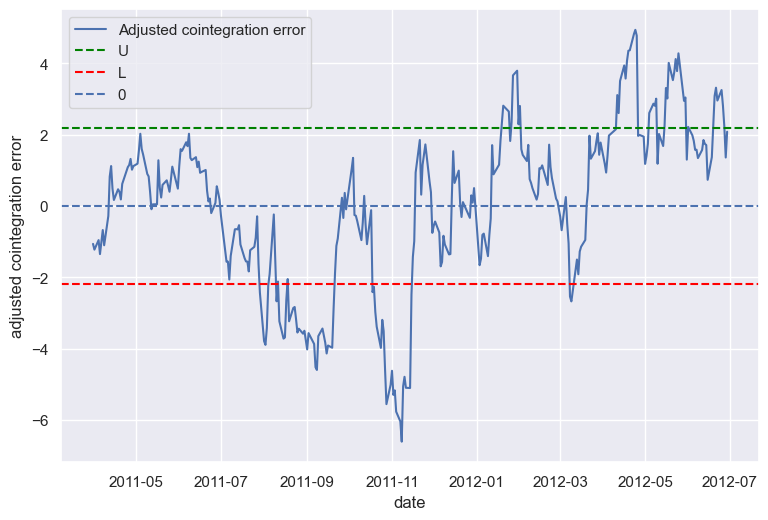

In [176]:
graph2 = sns.lineplot(x='date', y='adjusted cointegration error', data=df)
graph2.axhline(boundary, color ="green", linestyle='--')
graph2.axhline(-boundary, color ="red", linestyle='--')
graph2.axhline(0, linestyle='--')
graph2.legend(['Adjusted cointegration error', 'U', 'L', '0'])

# Part III

## Backtesting

In [177]:
# Initial specified values
TEST_START_DATE = datetime.datetime(2012, 7, 2)
TEST_END_DATE = datetime.datetime(2013, 2, 2)
INITIAL_S1 = 0
INITIAL_S2 = 0
INITIAL_CAP = 100000
N = 12

# Download data
stock11 = fetch_data(STOCK1, TEST_START_DATE, TEST_END_DATE)
stock22 = fetch_data(STOCK2, TEST_START_DATE, TEST_END_DATE)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [178]:
# Open a U-trade function
def open_u_trade(capital, s1, s2, price1, price2, betaa, n):
    capital += (price1 - betaa * price2) * n
    s1 += -1 * n
    s2 += round(betaa * n)
    return capital, s1, s2

In [179]:
# Open an L-trade function
def open_l_trade(capital, s1, s2, price1, price2, betaa, n):
    capital += (-price1 + betaa * price2) * n
    s1 += n
    s2 += -round(betaa * n)
    return capital, s1, s2

In [180]:
# Close the U-trades function
def close_u_trade(capital, s1, s2, price1, price2, betaa, n, num):
    for i in range(num):
        capital, s1, s2 = open_l_trade(capital, s1, s2, price1, price2, betaa, n)

    print('U-trades closed')
    print('Capital: ' + str(capital))
    print('S1: ' + str(s1))
    print('S2: ' + str(s2)) 

    return capital, s1, s2       

In [181]:
# Close the L-trades function
def close_l_trade(capital, s1, s2, price1, price2, betaa, n, num):
    for i in range(num):
        capital, s1, s2 = open_u_trade(capital, s1, s2, price1, price2, betaa, n)

    print('L-trades closed')
    print('Capital: ' + str(capital))
    print('S1: ' + str(s1))
    print('S2: ' + str(s2))    

    return capital, s1, s2

In [182]:
capital = INITIAL_CAP
S1 = INITIAL_S1
S2 = INITIAL_S2

# Number of opened trades
u_trade_num = 0
l_trade_num = 0

print('Initial capital: ' + str(capital))
print('Initial S1: ' + str(S1))
print('Initial S2: ' + str(S2))

# Trade
for i in range(len(stock11)):
    price1 = stock11.iloc[i,0]
    price2 = stock22.iloc[i,0]

    # Calculate adjusted cointegration error for each price pair with trained parameters
    ace = price1 - beta * price2 - coin_error.mean()

    # Check for opening a U-trade
    if ace >= boundary and not (ace <= 0 or i == len(stock11) - 1):
        capital, S1, S2 = open_u_trade(capital, S1, S2, price1, price2, beta, N)
        u_trade_num += 1
        print('U-trade opened')
        print('Capital: ' + str(capital))
        print('S1: ' + str(S1))
        print('S2: ' + str(S2))
    # Check for opening an L-trade
    elif ace <= -boundary and not (ace <= 0 or i == len(stock11) - 1):    
        capital, S1, S2 = open_l_trade(capital, S1, S2, price1, price2, beta, N)
        l_trade_num += 1
        print('L-trade opened')
        print('Capital: ' + str(capital))
        print('S1: ' + str(S1))
        print('S2: ' + str(S2))
    # Check for closing U-trades    
    elif u_trade_num > 0 and (ace <= 0 or i == len(stock11) - 1):
        capital, S1, S2 = close_u_trade(capital, S1, S2, price1, price2, beta, N, u_trade_num)
        u_trade_num = 0
    # Check for closing L-trades    
    elif l_trade_num > 0 and (ace >= 0 or i == len(stock11) - 1):
        capital, S1, S2 = close_l_trade(capital, S1, S2, price1, price2, beta, N, l_trade_num)
        l_trade_num = 0       

print('Final capital: ' + str(capital))
print('Final S1: ' + str(S1))
print('Final S2: ' + str(S2))

Initial capital: 100000
Initial S1: 0
Initial S2: 0
U-trade opened
Capital: 99947.62511139266
S1: -12
S2: 10
U-trade opened
Capital: 99905.66169710718
S1: -24
S2: 20
U-trade opened
Capital: 99856.70674139562
S1: -36
S2: 30
U-trade opened
Capital: 99801.50528447633
S1: -48
S2: 40
U-trade opened
Capital: 99746.32285365058
S1: -60
S2: 50
U-trade opened
Capital: 99707.40098943138
S1: -72
S2: 60
U-trade opened
Capital: 99661.10089540789
S1: -84
S2: 70
U-trade opened
Capital: 99630.59738328829
S1: -96
S2: 80
U-trade opened
Capital: 99595.98655281356
S1: -108
S2: 90
U-trade opened
Capital: 99561.11142203241
S1: -120
S2: 100
U-trade opened
Capital: 99514.3663781571
S1: -132
S2: 110
U-trade opened
Capital: 99471.15597831628
S1: -144
S2: 120
U-trade opened
Capital: 99429.93395392274
S1: -156
S2: 130
U-trade opened
Capital: 99389.10694535702
S1: -168
S2: 140
U-trade opened
Capital: 99344.76017045467
S1: -180
S2: 150
U-trade opened
Capital: 99324.18406482766
S1: -192
S2: 160
U-trade opened
Capital

## QUANTCONNECT 

![original image](https://cdn.mathpix.com/snip/images/nmfrqw2DkHF5eSkBDGxqBlQlpGnMXXMVT347hVAOkJc.original.fullsize.png)
![original image](https://cdn.mathpix.com/snip/images/mcx5cgzs-0YGBOPoz1knzAB32zO_T4Fns2uyqst9_3E.original.fullsize.png)
![original image](https://cdn.mathpix.com/snip/images/RVujI4tMXIZFlUQ0bijDrKsq8W0DxI1xfdScFHiZDFU.original.fullsize.png)
![original image](https://cdn.mathpix.com/snip/images/sJ0m2jo65n9Vx0eq7ww5n3Gj9zuRBrVK938uF_pyiVo.original.fullsize.png)
![original image](https://cdn.mathpix.com/snip/images/yWuuUVjQlhCXBMDwY7Bkcq1HifXmtBfin0n2P811xFA.original.fullsize.png)
